# <font face="times"><font size="6pt"><p style = 'text-align: center;'> The City University of New York, Queens College

<font face="times"><font size="6pt"><p style = 'text-align: center;'><b>Introduction to Computational Social Science</b><br/><br/>

<p style = 'text-align: center;'><font face="times"><b>Lesson 13 | Social Network Analysis II</b><br/><br/>

<p style = 'text-align: center;'><font face="times"><b>8 Checkpoints</b><br/><br/>



***
***

# Begin Lesson 13
## Social Network Analysis

This week, we're going dive into the meat of social network analysis. There is a lot that we can't cover, so we're going to focus on two big questions surrounding social networks:

1. How you can tell whether a node is "important" (this is what centrality is all about)
2. How you can identify "groups" in a network (we call them "communities")

***
***

## Centrality Measures

![Neuron](Images/13_Network_Centrality_Measures.png) 

Centrality measures are used to determine what structural features are afforded to nodes. In other words, we can look at where nodes are in the network and see what advantages or disadvantages they have as a result of how they are situated with respect to everyone else. Similarly we can use centrality measures to figure out which are the most important nodes for this or that. For instance, someone who is the sole "bridge" between two insular and seperate groups of the network acts as a gatekeeper of knowledge, where all knowledge about the other side needs to go through them first (think spies!).

There are several different centrality measures that can each tell us something different about the node's position. The image above shows three popular centrality meausres - (1) Betweenness; (2) Closeness; (3) and Eigenvector - and the nodes that have the highest values for each. We've actually already covered "Degree" centrality last week (i.e., total number of edges) so this should be somewhat familiar to you. 

These measures aren't necessarily mutually exclusive: a node can have have eigenvector and high degree centrality, for instance. However, this doesn't always hold (e.g., it's hard to have high betweeness centrality and high degree centrality).

We will only be talking about centrality measures in the context of undirected graphs. Be aware that the calculation and meaning of these measures changes in directed graphs, much like how degree needs to be measured as in-degree and out-degree in a directed graph.

Let's use the `Hartford` data again. 


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
hartford = nx.read_edgelist('Data/hartford_drug.txt', # Text file saved as an edgelist with a sender, receive column
                            create_using=nx.DiGraph(), # Set it up as a "Directed" graph
                            nodetype=int) # The nodes don't have labels, they are integers used to mask people's actually names. 
hartford_ud = hartford.to_undirected()

In [3]:
hartford_ud_components = [g for g in nx.connected_components(hartford_ud)][0]

***
***

# Checkpoint 1 of 8
## Now you try!

### Read in and set up the Star Wars data from last time. (Don't  use `read_edgelist()`, as this works better for unweighted networks. Call it `SW_G`. 

### Calculate the components of your network, `SW_G`. Save it as `sw_components`. 

In [4]:
import pandas as pd

In [5]:
Star_Wars_df = pd.read_csv("Data/star-wars-network-edges.csv")

In [6]:
SW_G = nx.from_pandas_edgelist(Star_Wars_df,
                              'source', 
                              'target', 
                              edge_attr='weight') 
SW_G_ud = SW_G.to_undirected()

In [7]:
SW_G_ud_components = [g for g in nx.connected_components(SW_G_ud)][0]

***
***

***
***

### Betweenness centrality

![Neuron](Images/13_Network_Betweeness.png) 

Betweenness centrality is based on communication flow. For instance, consider the hypothetical social network above of several friends. Nodes with a high betweenness centrality (like "Liz" in our social network here) are interesting because they lie on communication paths and can control information flows. In other words, nodes with high betweenness centrality are "between" a lot of information flow between all other nodes in the network. 

To calculate this, we can use the function `betweenness_centrality()`. Let's do this for the hartford data. 


In [8]:
# Betweenness centrality
bet_cen = nx.betweenness_centrality(hartford_ud)

In [9]:
# Let's get the maximum betweenness centrality in the network
print(max(bet_cen.values()))
print(min(bet_cen.values()))

0.3036115238857284
0.0


***
***

# Checkpoint 2 of 8
## Now you try!

### Calculate the betweenness centrality. Which nodes have the highest and lowest values? 

### For you Star Wars fans, does this make sense?

### For you non-Star Wars fans, recall the plot from last time. Does this make sense?
### **Hint:** Include the argument `weight` to indicate that this is a weighted network. For instance: 

                nx.betweenness_centrality(YOUR_NETWORK_HERE,weight='weight')

In [10]:
SW_bet_cen =nx.betweenness_centrality(SW_G_ud,weight='weight')

In [11]:
print(max(SW_bet_cen.values()))
print(min(SW_bet_cen.values()))

0.3155263157894737
0.0


***
***

***
***

### Closeness centrality

![Neuron](Images/13_Network_Closeness.png) 

Closeness centrality is the average distance between one node and the others in a network. Put in more technical language, it is the average of the length of all shortest paths between the node in question to all other nodes in the network.

It's a measure of "reach," or how fast information can flow to all other nodes from this node. So, as compared to other people in this same network, "Emma" is (on average) the "closest" to everyone else. She can easily spread information in the network.

To calculate this, we use `closeness_centrality()`.

In [12]:
# Closeness centrality
clo_cen = nx.closeness_centrality(hartford_ud)

In [13]:
# Again let's get the maximum and minimum
print(max(clo_cen.values()))
print(min(clo_cen.values()))

0.1952077100267415
0.004739336492890996


***
***

# Checkpoint 3 of 8
## Now you try!

### Calculate the closeness centrality. 

### Note: You'll need to consider the weights on the edges, but the `NetworkX` closeness centrality function lacks a "weight" parameter. Instead, you'll need to pass in a distance parameter. 

#### First, use the code below to calculate the distance metric between nodes in your Star Wars network. Notice that distance is the inverse of weight. Why? Think about it: if two nodes are VERY strongly connected (i.e., a high weight value), they would be pretty close, so the distance between them would be small! Thus, distance is defined as the inverse of weight. 

    SW_distance_dict = {(e1, e2): 1/weight for e1, e2, weight in YOUR_STARWARS_GRAPH_HERE.edges(data='weight')}

#### Second, apply the `set_edge_attributes()` function to your Star Wars graph. Specifically, you'll set the attribute "distance" to your Star Wars graph. 
    nx.set_edge_attributes(YOUR_STARWARS_GRAPH_HERE, SW_distance_dict, 'distance')

### Finally, for closeness centrality, pass in the parameter "distance"
    nx.closeness_centrality(YOUR_STARWARS_GRAPH_HERE, distance='distance')

### Again, which nodes have the highest and lowest values? 

### For you Star Wars fans, does this make sense?

### For you non-Star Wars fans, recall the plot from last time. Does this make sense?

In [14]:
SW_distance_dict = {(e1, e2): 1/weight for e1, e2, weight in SW_G.edges(data='weight')}

In [15]:
nx.set_edge_attributes(SW_G, SW_distance_dict, 'distance')

In [16]:
SW_clo_cen =nx.closeness_centrality(SW_G, distance='distance')

In [17]:
# Again let's get the maximum and minimum
print(max(SW_clo_cen.values()))
print(min(SW_clo_cen.values()))

1.8446616010796038
0.660695245773133


***
***

***
***

### Eigenvector centrality

![Neuron](Images/13_Network_Eigenvector.png) 

Eigenvector centrality is the most abstract to think of, but its arguably one of the most important and applicable. Think of it as a measure of how important your neighbors are. The intuition here is that a person (or website, or scholarly article, or politician) is important when they are connected to important people (or websites, or scholarly articles, or politicians, respectively).

For instance, consider this new network above. The node in yellow has the highest eigenvector centrality, because its connected to the two most popular nodes in blue. Note, that the nodes in blue are well connected, they're not connected to the other popular blue nodes.

This is how Google's PageRank algorithm works: if you're a blogger that the New York Times and CNN links to and cites, then you have a high eigenvector score, even if not that many other people link to your site. Think of it like a "reputation score." Webpages (like blogs) that have higher eigenvector scores are more likely to show up as one of your top search results than a webpage that just has a lot of non-important links. 

To calculate this, use the function `eigenvector_centrality()`.

In [18]:
# Eigenvector centrality
eig_cen = nx.eigenvector_centrality(hartford_ud)

In [19]:
# Max and min again
print(max(eig_cen.values()))
print(min(eig_cen.values()))

0.48466399479370187
2.6592188629189117e-27


***
***

# Checkpoint 4 of 8
## Now you try!

### Calculate the eigenvector centrality. Again, which nodes have the highest and lowest values? 

### For you Star Wars fans, does this make sense?

### For you non-Star Wars fans, recall the plot from last time. Does this make sense?

### **Hint:** Include the argument `weight` to indicate that this is a weighted network. 


In [20]:
# Eigenvector centrality
SW_eig_cen = nx.eigenvector_centrality(SW_G)

In [21]:
# Max and min again
print(max(SW_eig_cen.values()))
print(min(SW_eig_cen.values()))

0.4173849989544929
0.034589934913482716


***
***

***
***

## Bipartite Networks

![Neuron](Images/13_Network_Bipartite.png) 



So far, we've only looked at networks with different types of edges-- directed, weighted, multiplex. We have yet to look at networks that have different types of nodes. For instance, consider the network shown above. It is a network comprised of two different types of nodes. You could think of them as people in the class and their various social affliations, like the high school they attended, college you currently attend, city you grew up in, where you work, etc. Bipartite networks are particulary helpful at understanding membership in groups (e.g., how people know one another from having the same membership, what potential advantages or disadvantages they may have due to these memberships, etc.). 

The bipartite algorithms are not imported into the NetworkX namespace at the top level so the easiest way to use them is with `bipartite` from `networkx.algorithms`.

In [22]:
from networkx.algorithms import bipartite

Let's first learn how to creat a bipartite graph from scratch, just let we did with what we call unipartite graphs (i.e., networks with just one type of node, which is what we've been dealing with exclusively so far). 

`NetworkX` doesn't have an explicity bipartite graph, so we'll have to define one from the basic `Graph()` object. 

In [23]:
B = nx.Graph()

Let's add nodes with the node attribute "bipartite." Let's also base it on the graph we see above, so let's add persons "a","b","c","d", and "e".

In [24]:
B.add_nodes_from(['a', 'b', 'c','d','e'], 
                 bipartite=0) #We set bipartite to be 0, the first class of nodes. 

In [25]:
B.add_nodes_from([1, 2, 3, 4], 
                 bipartite=1)

Now, add edges only between nodes of opposite node sets. 

In [26]:
B.add_edges_from([('a',1), ('a',2), 
                  ('b',2), ('b',3),
                  ('c',1), ('c',3),
                  ('d',2),('d',4),
                  ('e',3),('e',4) ])

In [27]:
X, Y = bipartite.sets(B)

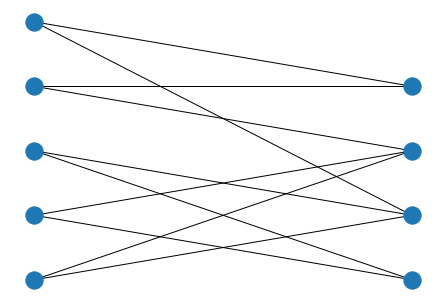

In [28]:
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(B, pos=pos)
plt.show()

***
***

# Checkpoint 5 of 8
## Now you try!

### Create your own bipartite network! 

### Create one set of nodes, call them: `x`, `y`, and `z`. These are the senders. 
### Create a second set of nodes, call them: `10`, `11`, `12`, and `13`. These are the receivers. 
### Call your new bipartite network `B2`. 

### Use the method `.add_edges_from()` and add random edges going from the senders to the receivers. Create at least six links from the senders to the receivers. 

### Draw `B2`. 

In [29]:
B2 = nx.Graph()

In [30]:
B2.add_nodes_from(['x', 'y', 'z'], 
                 bipartite=0)

In [31]:
B2.add_nodes_from([10, 11, 12, 13], 
                 bipartite=1)

In [32]:
B2.add_edges_from([('x',10), ('x',11),
                   ('x',12), ('x',13),
                   ('y',10), ('y',11),
                   ('y',12),('y',13),
                   ('z',10),('z',11),
                   ('z',12),('z',13) ])

In [33]:
X, Y = bipartite.sets(B2)

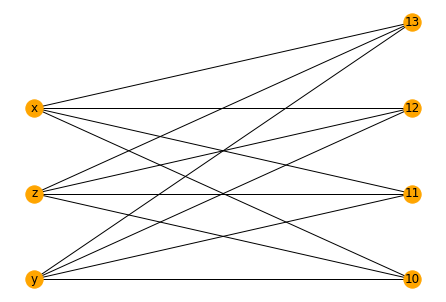

In [34]:
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) )
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) 
nx.draw(B2, pos=pos,node_color='orange', with_labels=True)
plt.show()

***
***

***
***

## Real-world Bipartite Data. 

Let's now use some real-world data. 

We'll use as an example the data collected by Davis et al. in 1930s about the observed attendance at 14 social events by 18 women in a Southern state of the USA.

The nodes in the bipartite graph are both women and events, and each women is linked to the events that she attended.

In [35]:
D = nx.davis_southern_women_graph()
list(D.nodes(data=True))

[('Evelyn Jefferson', {'bipartite': 0}),
 ('Laura Mandeville', {'bipartite': 0}),
 ('Theresa Anderson', {'bipartite': 0}),
 ('Brenda Rogers', {'bipartite': 0}),
 ('Charlotte McDowd', {'bipartite': 0}),
 ('Frances Anderson', {'bipartite': 0}),
 ('Eleanor Nye', {'bipartite': 0}),
 ('Pearl Oglethorpe', {'bipartite': 0}),
 ('Ruth DeSand', {'bipartite': 0}),
 ('Verne Sanderson', {'bipartite': 0}),
 ('Myra Liddel', {'bipartite': 0}),
 ('Katherina Rogers', {'bipartite': 0}),
 ('Sylvia Avondale', {'bipartite': 0}),
 ('Nora Fayette', {'bipartite': 0}),
 ('Helen Lloyd', {'bipartite': 0}),
 ('Dorothy Murchison', {'bipartite': 0}),
 ('Olivia Carleton', {'bipartite': 0}),
 ('Flora Price', {'bipartite': 0}),
 ('E1', {'bipartite': 1}),
 ('E2', {'bipartite': 1}),
 ('E3', {'bipartite': 1}),
 ('E4', {'bipartite': 1}),
 ('E5', {'bipartite': 1}),
 ('E6', {'bipartite': 1}),
 ('E7', {'bipartite': 1}),
 ('E8', {'bipartite': 1}),
 ('E9', {'bipartite': 1}),
 ('E10', {'bipartite': 1}),
 ('E11', {'bipartite': 1}

### Centrality measures of bipartite graphs

In order to compute centrality measures for bipartite graphs, we cannot use the same algorithms that we used for unipartite graphs. This is because how these measures are normalized is different. 

For instance, the degree centrality of a node is defined as the degree of a node divided by the maximum possible degree. In unipartite networks, the maximum degree of a node is $n-1$, where $n$ is the total number of nodes of a graph. However, in a bipartite graph, a node's maximum degree is only the total number of nodes in the opposite set. In other words, the maximum degree for a woman in our graph is the number of events, not the number of women.

`NetworkX` provides functions to compute centrality measures for bipartite graphs.

In order to use these functions you have to pass as an argument a set with all nodes in one bipartite set. We'll need `itemgetter` to extract out the values for each key-value pair in the dictionary. 

In [36]:
from operator import itemgetter

Now, let's get the degree, betweenness, and closeness centralities for the bipartite network. First we have to make a set of nodes to indicate which are women, and which are events.

In [37]:
women = [n for n, d in D.nodes(data=True) if d['bipartite']==0]
events = [n for n, d  in D.nodes(data=True) if d['bipartite']==1]

In [38]:
degc = bipartite.degree_centrality(D, women)
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('E8', 0.7777777777777777),
 ('E9', 0.6666666666666666),
 ('Theresa Anderson', 0.5714285714285714),
 ('Nora Fayette', 0.5714285714285714),
 ('Evelyn Jefferson', 0.5714285714285714),
 ('E7', 0.5555555555555556),
 ('Sylvia Avondale', 0.5),
 ('Laura Mandeville', 0.5),
 ('Brenda Rogers', 0.5),
 ('E5', 0.4444444444444444),
 ('E6', 0.4444444444444444),
 ('Katherina Rogers', 0.42857142857142855),
 ('Helen Lloyd', 0.3571428571428571),
 ('E3', 0.3333333333333333),
 ('E12', 0.3333333333333333),
 ('Charlotte McDowd', 0.2857142857142857),
 ('Verne Sanderson', 0.2857142857142857),
 ('Myra Liddel', 0.2857142857142857),
 ('Frances Anderson', 0.2857142857142857),
 ('Eleanor Nye', 0.2857142857142857),
 ('Ruth DeSand', 0.2857142857142857),
 ('E10', 0.2777777777777778),
 ('E4', 0.2222222222222222),
 ('E11', 0.2222222222222222),
 ('Pearl Oglethorpe', 0.21428571428571427),
 ('E1', 0.16666666666666666),
 ('E2', 0.16666666666666666),
 ('E13', 0.16666666666666666),
 ('E14', 0.16666666666666666),
 ('Dorothy M

In [39]:
bet = bipartite.betweenness_centrality(D, women)
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('E8', 0.24381946234957552),
 ('E9', 0.22551359177204106),
 ('E7', 0.12950174424519842),
 ('Nora Fayette', 0.11346136204298476),
 ('Evelyn Jefferson', 0.09658472108029267),
 ('Theresa Anderson', 0.08759468547944677),
 ('Sylvia Avondale', 0.07170914508501829),
 ('E6', 0.06501635047516072),
 ('Laura Mandeville', 0.05135761326872536),
 ('Brenda Rogers', 0.0494865998160072),
 ('Katherina Rogers', 0.047362754029819695),
 ('Helen Lloyd', 0.04238754006434827),
 ('E5', 0.03769444252500667),
 ('E11', 0.01966539088919154),
 ('E3', 0.01822439085252718),
 ('E12', 0.018094182051395145),
 ('Ruth DeSand', 0.016783108139791406),
 ('Myra Liddel', 0.016344348365012626),
 ('Verne Sanderson', 0.015737665757646964),
 ('E10', 0.011442302600971925),
 ('Frances Anderson', 0.01071434286960598),
 ('Charlotte McDowd', 0.010596096282664414),
 ('Eleanor Nye', 0.00944412334473028),
 ('E4', 0.0077020526738029406),
 ('Pearl Oglethorpe', 0.006800323334013807),
 ('Olivia Carleton', 0.005054505236263333),
 ('Flora Pric

In [40]:
clos = bipartite.closeness_centrality(D, women)
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('E8', 0.8461538461538461),
 ('Theresa Anderson', 0.8),
 ('Nora Fayette', 0.8),
 ('Evelyn Jefferson', 0.8),
 ('E9', 0.7857142857142857),
 ('Sylvia Avondale', 0.7741935483870968),
 ('E7', 0.7333333333333333),
 ('Katherina Rogers', 0.7272727272727273),
 ('Laura Mandeville', 0.7272727272727273),
 ('Brenda Rogers', 0.7272727272727273),
 ('Helen Lloyd', 0.7272727272727273),
 ('Verne Sanderson', 0.7058823529411765),
 ('Ruth DeSand', 0.7058823529411765),
 ('E6', 0.6875),
 ('Myra Liddel', 0.6857142857142857),
 ('Frances Anderson', 0.6666666666666666),
 ('Eleanor Nye', 0.6666666666666666),
 ('Pearl Oglethorpe', 0.6666666666666666),
 ('Dorothy Murchison', 0.6486486486486487),
 ('Charlotte McDowd', 0.6),
 ('E5', 0.5945945945945946),
 ('Olivia Carleton', 0.5853658536585366),
 ('Flora Price', 0.5853658536585366),
 ('E3', 0.5641025641025641),
 ('E12', 0.5641025641025641),
 ('E10', 0.55),
 ('E4', 0.5365853658536586),
 ('E11', 0.5365853658536586),
 ('E1', 0.5238095238095238),
 ('E2', 0.52380952380952

What do you notice about the centrality scores for both women and the events attended? How are they similar? How are they different?

***
***

## Projection from bipartite to unipartite


The process of obtaining an unipartite graph (i.e., with only women that are linked if they attended the same events) is called **projection**. It's called projection because we are "projecting" information from two-dimensions (e.g., women and their events as distinct dimensions) into one-dimension (e.g., women who attended the same event).

We can weight the edges of the projection using different criteria. For instance, if two women attended several of the same events together, we can create an edge between them to carry a higher weight than say two other women who attended only one event together. In other words, we can weigh the edges of this projection based on the number of shared events women attended.

Let's double check our list of women again.

In [41]:
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

With this in tow, let's use the `bipartite` graph and perform a weighted projection. In other words, we're going to take the information about women and the events the attended (a bitpartite network) into a network of women, where the link between them is the number of events they attended together. We'll call this projection `W`. 

In [42]:
W = bipartite.weighted_projected_graph(D, women)

First, let's list the nodes (i.e., the women). 

In [43]:
list(W.nodes())

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

Now, let's get the edgelist of women to see how often women co-attended events together. 

In [44]:
list(W.edges(data=True))

[('Evelyn Jefferson', 'Theresa Anderson', {'weight': 7}),
 ('Evelyn Jefferson', 'Katherina Rogers', {'weight': 2}),
 ('Evelyn Jefferson', 'Dorothy Murchison', {'weight': 2}),
 ('Evelyn Jefferson', 'Verne Sanderson', {'weight': 2}),
 ('Evelyn Jefferson', 'Brenda Rogers', {'weight': 6}),
 ('Evelyn Jefferson', 'Flora Price', {'weight': 1}),
 ('Evelyn Jefferson', 'Frances Anderson', {'weight': 4}),
 ('Evelyn Jefferson', 'Ruth DeSand', {'weight': 3}),
 ('Evelyn Jefferson', 'Nora Fayette', {'weight': 2}),
 ('Evelyn Jefferson', 'Eleanor Nye', {'weight': 3}),
 ('Evelyn Jefferson', 'Pearl Oglethorpe', {'weight': 3}),
 ('Evelyn Jefferson', 'Sylvia Avondale', {'weight': 2}),
 ('Evelyn Jefferson', 'Laura Mandeville', {'weight': 6}),
 ('Evelyn Jefferson', 'Charlotte McDowd', {'weight': 3}),
 ('Evelyn Jefferson', 'Myra Liddel', {'weight': 2}),
 ('Evelyn Jefferson', 'Helen Lloyd', {'weight': 1}),
 ('Evelyn Jefferson', 'Olivia Carleton', {'weight': 1}),
 ('Laura Mandeville', 'Theresa Anderson', {'weig

Now that it's a unipartite network, we can run the first set of degree centrality measures. Let's try two: betweenness and closeness. 

Use both measures and apply it to `W`. 

In [45]:
bet_cen_W = nx.betweenness_centrality(W,weight='weight')

In [46]:
bet_cen_W

{'Evelyn Jefferson': 0.0006684491978609625,
 'Laura Mandeville': 0.003326330532212885,
 'Theresa Anderson': 0.0006684491978609625,
 'Brenda Rogers': 0.003326330532212885,
 'Charlotte McDowd': 0.01531862745098039,
 'Frances Anderson': 0.057860644257703084,
 'Eleanor Nye': 0.004551820728291317,
 'Pearl Oglethorpe': 0.0006684491978609625,
 'Ruth DeSand': 0.0006684491978609625,
 'Verne Sanderson': 0.0184643175451999,
 'Myra Liddel': 0.05372938948306596,
 'Katherina Rogers': 0.05372938948306596,
 'Sylvia Avondale': 0.0184643175451999,
 'Nora Fayette': 0.01092436974789916,
 'Helen Lloyd': 0.06168870957473897,
 'Dorothy Murchison': 0.09577006939139289,
 'Olivia Carleton': 0.13628485485103134,
 'Flora Price': 0.13628485485103134}

In [47]:
clo_cen_W = nx.closeness_centrality(W)

In [48]:
clo_cen_W

{'Evelyn Jefferson': 1.0,
 'Laura Mandeville': 0.8947368421052632,
 'Theresa Anderson': 1.0,
 'Brenda Rogers': 0.8947368421052632,
 'Charlotte McDowd': 0.7391304347826086,
 'Frances Anderson': 0.8947368421052632,
 'Eleanor Nye': 0.8947368421052632,
 'Pearl Oglethorpe': 0.9444444444444444,
 'Ruth DeSand': 1.0,
 'Verne Sanderson': 1.0,
 'Myra Liddel': 0.9444444444444444,
 'Katherina Rogers': 0.9444444444444444,
 'Sylvia Avondale': 1.0,
 'Nora Fayette': 1.0,
 'Helen Lloyd': 1.0,
 'Dorothy Murchison': 0.9444444444444444,
 'Olivia Carleton': 0.7727272727272727,
 'Flora Price': 0.7727272727272727}

How do these centrality measures used on the unipartite **projection** network compare to the bipartite measures?

***
***

# Checkpoint 6 of 8
## Now you try!

### We're going to take your bipartite network `B2` and project it to make unipartite network. Call it `B2_U`. 

### Calculate any two centrality scores you'd like from `B2_U`. 


In [49]:
B2

In [50]:
D

In [51]:
p_nodes = [n for n, d in B2.nodes(data=True) if d['bipartite']==0]
s_nodes = [n for n, d  in B2.nodes(data=True) if d['bipartite']==1]

In [52]:
B2_U = bipartite.weighted_projected_graph(B2, p_nodes)

In [53]:
list(B2_U.edges(data=True))

[('x', 'z', {'weight': 4}),
 ('x', 'y', {'weight': 4}),
 ('y', 'z', {'weight': 4})]

In [54]:
bet_cen_B2_U = nx.betweenness_centrality(B2_U,weight='weight')

In [55]:
bet_cen_B2_U

{'x': 0.0, 'y': 0.0, 'z': 0.0}

In [56]:
clo_cen_B2_U = nx.closeness_centrality(B2_U)

In [57]:
clo_cen_B2_U

{'x': 1.0, 'y': 1.0, 'z': 1.0}

***
***

***
***

## Community Detection


![Neuron](Images/13_Network_Communities.png) 

Facebook data are a great place to start to study community detection analysis in social networks. Why? Think about your Facebook friends. They probably come from different aspects of your life: Some are your friends from college, others are your co-workers, and maybe some old friends from your hometown.

Because your friends can be broken down into different groups like this, you may wonder if we could identify these different communities in your social network. Using community detection algorithms, we can break down a social network into different potentially overlapping communities. For instance, consider the image above of two hypothetical networks, where "communities" of nodes are distinctly color-coded. Notice that in many ways, these communities are both distinct and overlap. This could be the overlap of highschool and hometown friends; or college friends and graduate school friends; etc.

There are a bunch of different strategies for finding communities in social network data. Like we've discussed with other methods in data science, the right way to detect communities depends on what intuition you have about your data. The algorithms that distinguish one community detection method from another, in particular, vary by what structural features they emphasize in the network. For instance, for the two we're going to talk about right now:

- Modularity maximization tries to maximize the number of edges within a cluster, and minimize the number of edges going between clusters
- Clique percolation focuses on fully connected sets of nodes (i.e. cliques)

---

---

### Modularity maximization
Let's start with the more popular, modularity maximization. The main criterion for finding good communities here is that we want to maximize intra-community edges while minimizing inter-community edges. Formally, the algorithm tries to maximize the modularity of network, or the fraction of edges that fall within a community minus the expected fraction of edges if the edges were distributed by random. Good communities should have a high number of intra-community edges, so by maximizing the modularity, we detect dense communities that have a high fraction of intra-community edges.

**Important notes:**
1. Modularity maximization is popular because it is fast (relatively speaking). Community detection takes loads of computing power, and the simplicity of modularity maximization makes it faster to implement.
2. **But** modularity maximization has serious flaws. It has trouble finding small communities (this has been called its [resolution limit](http://www.pnas.org/content/104/1/36)), and worse, modularity does not always have a global maximum, leading to an almost infinite number of "right" solutions according to modularity maximization (see [this paper](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.81.046106) if you're curious). How badly this is going to affect your work depends on the size of your network and the types of communities you are expecting. Unless computing power is a limiting factor, it's usually better to avoid using this approach.

Still, modularity maximization is probably the most popular community detection scheme out there, so you are better off knowing what it is. We're going to use the `community` module, provided for you as a folder in your Notebook directory. We're also going to read in `NetworkX` and `matplotlib` for when we plot these networks. We're also going to suppress any warning messages we get from plotting these networks. 

In [62]:
import networkx as nx
#import community
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [63]:
!pip3.6 install --user python-louvain
from community import community_louvain

Looking in links: /usr/share/pip-wheels


Let's read in some Facebook data. These data are from SNAP (Stanford Network Analysis Project). They were collected data from a survey of Facebook users. (More information here: https://snap.stanford.edu/data/egonets-Facebook.html.) These data are very large, so many of things that we're going to run will probably take a bit longer than ususal. 

In [64]:
G_fb = nx.read_edgelist("Data/facebook_combined.txt", 
                        create_using = nx.Graph(), 
                        nodetype = int)

Let's get some basic information from these data using the function `info()`. 

This network is pretty large.  

In [65]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


First, let's plot this network. Let's do it using a "spring layout," like the one we learned about last week.

**Note: This will take a few minutes to run!**


First, let's take a look at the network. Create network layout for visualizations. 

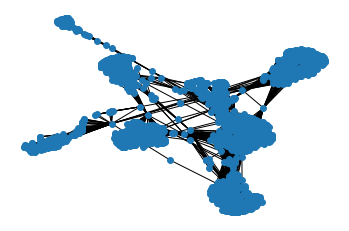

In [66]:
spring_pos = nx.spring_layout(G_fb)
plt.axis("off")
nx.draw_networkx(G_fb, 
                 pos = spring_pos, 
                 with_labels = False, 
                 node_size = 35)

Let's run a community detection analysis from the package `community` (because NetworkX made the decision to not even support modularity maximization in its package) and cluster nodes together. First we're going to run the function called `.best_partition()` from `community` on `G_fb`, our `NetworkX` object. 

In [67]:
mod_communities = community.best_partition(G_fb)

Let's take a look at what's in the `mod_communities` object now. It looks like a really long dictionary. In fact, it's a dictionary where all of the keys are nodes in the network, `G_fb`. The values correspond to its community assignment. 

In [68]:
mod_communities

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 1,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 2,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 3,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

Let's extract the values (i.e., communities) from this `dictionary` and use a list and a set to find all of the unique values. This will give us a list of all of the communities that the algorithm detected. 

We see that it found a total of 16 communities, which it numbered from 0 to 15. 

In [69]:
list(set(list(mod_communities.values())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

Now, let's create a list for each node, indicating which "community" it happens to be in. Let's save this as `mod_values`. For every node in `G_fb`--designated by `G_fb.nodes()`--loop through each one and return its corresponding community allocation. 

Since `mod_communities` is a `dictionary`, we can use `mod_communities.get()` to return the community id (e.g., 0 through 15). We just have to pass in the node (as the key) to get the community ID (which returns the key's value). 

In [70]:
mod_values = [mod_communities.get(node) for node in G_fb.nodes()]

Now, let's draw the exact same network again, but let's color in the nodes based on which community they belong to using the list `values` that we just defined. 

We'll attach a lovely set of functions written by a [fellow on Stack Overflow](https://stackoverflow.com/questions/17511949/group-vertices-in-clusters-using-networkx?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa) that create a layout for your network according to a dictionary of nodes and communities. 

It's long...really long...so keep scrolling.

In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

In [73]:
def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

In [74]:
def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

In [75]:
def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

Take a look and see how well the modularity maximization method did at finding these hidden groups.

We're going to take our function `community_layout()`, passing in our network `G_fb` and the communities we detected `mod_communities`, and then plot we'll color in (and position) the nodes from the graph based on what community it belongs to. 

You'll see a nice seperation! 

**Note: This will take a few minutes to run!**

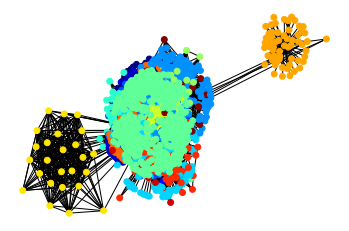

In [76]:
plt.axis("off")
nx.draw_networkx(G_fb, 
                 pos = community_layout(G_fb, mod_communities), #This is our function community_layout()
                 cmap = plt.get_cmap("jet"), 
                 node_color = mod_values, # Let's color the node based on which community it happens to be in. 
                 node_size = 35, 
                 with_labels = False)

***
***

# Checkpoint 7 of 8
## Now you try!

### You the Star Wars graph from earlier `SW_G` and let's see what communities we can uncover. 

### Use the function provided here `community_layout()` and pass in the Stars Wars graph and the partitions from `community.best_partition()` to plot the Star Wars graph based on each node's community assignment. 

In [ ]:
SW_G

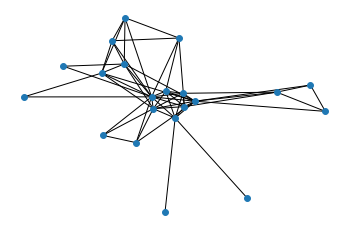

In [77]:
spring_pos = nx.spring_layout(SW_G)
plt.axis("off")
nx.draw_networkx(SW_G, 
                 pos = spring_pos, 
                 with_labels = False, 
                 node_size = 35)

In [78]:
mod_communities = community.best_partition(SW_G)

In [79]:
mod_communities

{'C-3PO': 0,
 'R2-D2': 0,
 'LUKE': 1,
 'OBI-WAN': 1,
 'LEIA': 1,
 'HAN': 1,
 'CHEWBACCA': 1,
 'DODONNA': 2,
 'DARTH VADER': 3,
 'CAMIE': 2,
 'BIGGS': 2,
 'BERU': 0,
 'OWEN': 0,
 'MOTTI': 3,
 'TARKIN': 3,
 'GREEDO': 1,
 'JABBA': 1,
 'GOLD LEADER': 2,
 'WEDGE': 2,
 'RED LEADER': 2,
 'RED TEN': 2}

In [80]:
list(set(list(mod_communities.values())))

[0, 1, 2, 3]

In [81]:
mod_values = [mod_communities.get(node) for node in SW_G.nodes()]

In [82]:
def community_layout(g, partition):
    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

In [83]:
def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

In [84]:
def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

In [85]:
def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

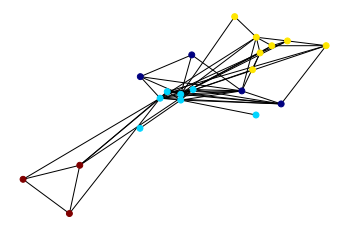

In [88]:
plt.axis("off")
nx.draw_networkx(SW_G, 
                 pos = community_layout(SW_G, mod_communities), #This is our function community_layout()
                 cmap = plt.get_cmap("jet"), 
                 node_color = mod_values, # Let's color the node based on which community it happens to be in. 
                 node_size = 35, 
                 with_labels = False)

***
***

***
***

### Clique percolation
Finally we'll try clique percolation, which as you might guess works by finding cliques in the network. In practice, it tries to connect k-cliques across the network to form communities. 

Say you have a clique with three members. Clique percolation looks for any other 3-cliques that it might be connected to, and any 3-cliques that those might be connected to, and so on. All those nodes taken together form communities.

Clique percolation tends to be better at finding community structure than modularity maximization. If you are interested in the density of connections, clique percolation is probably best.

Again, this comes implemented in the NetworkX package as `k_clique_communites`. First we'll try to use clique percolation with our Hartford network, but we'll run it for 2-cliques, 3-cliques, AND 4-cliques, separately to see what happens.

In [89]:
# First let's get the community detection functions from community in networkx
from networkx.algorithms import community as cm

In [90]:
cp_communities2 = cm.k_clique_communities(hartford_ud, 2) # 2-cliques
cp_communities3 = cm.k_clique_communities(hartford_ud, 3) # 3-cliques
cp_communities4 = cm.k_clique_communities(hartford_ud, 4) # 4-cliques

The function spits out an iterator. We'll process them in the similar way. We'll have to add a statement to our loops just in case a node is not part of any of our k-cliques.

Let's turn our code into a function, since we're running it over and over. 

In [91]:
def get_membership(graph, community_obj, k):
    member_list = list(community_obj)
    member_dict = {}
    print('There are', len(member_list), 'communities according to the clique percolation algorithm for', k, '-cliques \n')
    for node in graph.nodes():
        for community in range(0, len(member_list)): # Check every community for the node
            if node in member_list[community]:
                member_dict[node] = community
                break
            elif community == (len(member_list)-1) and node not in member_list[community]:
                member_dict[node] = 999   
    return(member_dict)

Run the function and get the membership dictionaries.

The function should output the number of communities according to each approach. 

In [92]:
cp_membership2 = get_membership(hartford_ud, cp_communities2, 2)
cp_membership3 = get_membership(hartford_ud, cp_communities3, 3)
cp_membership4 = get_membership(hartford_ud, cp_communities4, 4)

There are 9 communities according to the clique percolation algorithm for 2 -cliques 

There are 22 communities according to the clique percolation algorithm for 3 -cliques 

There are 1 communities according to the clique percolation algorithm for 4 -cliques 



Let's start with the 2-Clique model. 

First, get the list of group memberships to color our graphs.

In [93]:
cp_values2 = [value for value in cp_membership2.values()]

Now we can plot it.

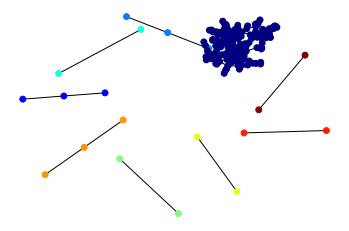

In [94]:
# 2-Cliques
plt.axis("off")
nx.draw_networkx(hartford_ud,
                 pos = community_layout(hartford_ud, cp_membership2),
                 cmap = plt.get_cmap("jet"), 
                 node_color = cp_values2, 
                 node_size = 35, 
                 with_labels = False)

For 3 and 4 cliques (`cp_values3` and `cp_values4`), we need to do a few extra steps. 

Namely, we have to subset the graph to get rid of the unconnected nodes that we coded as 999. 

In [95]:
# 3-Cliques
# First we have to subset the graph to get rid of the unconnected nodes that we coded as 999
node_subset3 = [k for k in cp_membership3.keys() if cp_membership3[k] != 999]
cp_values3 = [cp_membership3[k] for k in cp_membership3.keys() if cp_membership3[k] != 999]

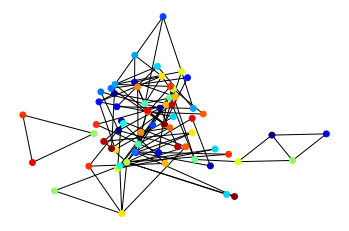

In [96]:
plt.axis("off")
nx.draw_networkx(hartford_ud.subgraph(node_subset3),
                 pos = community_layout(hartford_ud, cp_membership3),
                 cmap = plt.get_cmap("jet"), 
                 node_color = cp_values3, 
                 node_size = 35, 
                 with_labels = False)

In [97]:
# 4-Cliques
# First we have to subset the graph to get rid of the unconnected nodes that we coded as 999
node_subset4 = [k for k in cp_membership4.keys() if cp_membership4[k] != 999]
cp_values4 = [cp_membership4[k] for k in cp_membership4.keys() if cp_membership4[k] != 999]

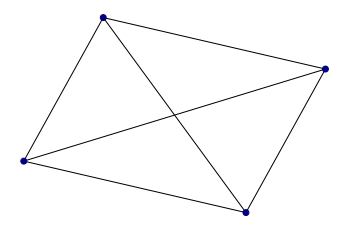

In [98]:
plt.axis("off")
nx.draw_networkx(hartford_ud.subgraph(node_subset4),
                 pos = community_layout(hartford_ud, cp_membership4),
                 cmap = plt.get_cmap("jet"), 
                 node_color = cp_values4, 
                 node_size = 35, 
                 with_labels = False)

Clique percolation with 4-cliques is essentially useless for the Hartford network because there is only one 4-clique in the entire graph! 

That said, in other graphs 4-cliques might be the **most** useful choice. Using 3-cliques finds a whole lot of structure, but it is pretty chaotic.

We can also compare this with the modularity maximization algorithm. Let's run that quickly on the Hartford data.

In [99]:
mod_communities = community.best_partition(hartford_ud)
mod_values = [mod_communities.get(node) for node in hartford_ud.nodes()]

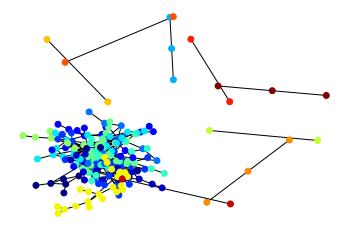

In [100]:
plt.axis("off")
nx.draw_networkx(hartford_ud,
                 pos = community_layout(hartford_ud, mod_communities),
                 cmap = plt.get_cmap("jet"), 
                 node_color = mod_values, 
                 node_size = 35, 
                 with_labels = False)

It is much more aggressive than our other algorithms in partioning this network.

How you deploy community detection should depend on the nuances of your data. Don't choose an algorithm blindly.

Quick (and overly simplified) summary: 

- **Modularity maximization** is fast but inaccurate. It maximizes edges within a community and minimizes those going between communities.

- **Clique percolation** is slower than modularity maximization in most cases. Building itself up from connected cliques, its accuracy depends on your choice of k.

***
***

# Checkpoint 8 of 8
## Now you try!

### Run either a 2-Clique, 3-Clique, or a 4-Clique algorithm on your Star Wars graph `SW_G`. 
### Be sure to first remove any `999` values for nodes not assigned to any clique. 

### Finally, plot the graph based on the community assignments from your n-clique choice. How does it compare to the earlier plot?

In [106]:
cp_communities2 = cm.k_clique_communities(SW_G, 2)

In [107]:
def get_membership(graph, community_obj, k):
    member_list = list(community_obj)
    member_dict = {}
    print('There are', len(member_list), 'communities according to the clique percolation algorithm for', k, '-cliques \n')
    for node in graph.nodes():
        for community in range(0, len(member_list)): # Check every community for the node
            if node in member_list[community]:
                member_dict[node] = community
                break
            elif community == (len(member_list)-1) and node not in member_list[community]:
                member_dict[node] = 999   
    return(member_dict)

In [108]:
cp_membership2 = get_membership(SW_G, cp_communities2, 2)

There are 1 communities according to the clique percolation algorithm for 2 -cliques 



In [109]:
cp_values2 = [value for value in cp_membership2.values()]

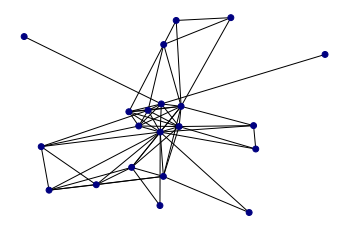

In [111]:
# 2-Cliques
plt.axis("off")
nx.draw_networkx(SW_G,
                 pos = community_layout(SW_G, cp_membership2),
                 cmap = plt.get_cmap("jet"), 
                 node_color = cp_values2, 
                 node_size = 35, 
                 with_labels = False)

***
***